# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

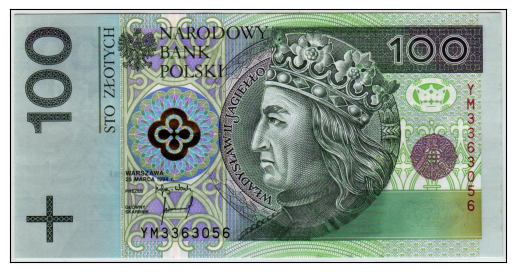

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

stowa = cv2.cvtColor(cv2.imread("100zloty.jpg"), cv2.COLOR_BGR2RGB)

plt.imshow(stowa)
plt.xticks([]), plt.yticks([])
plt.show()


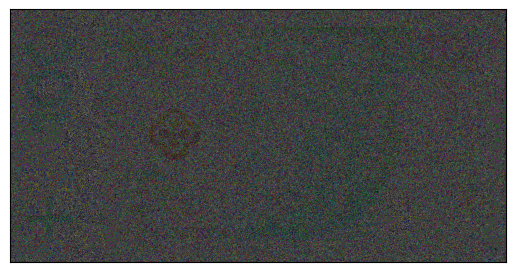

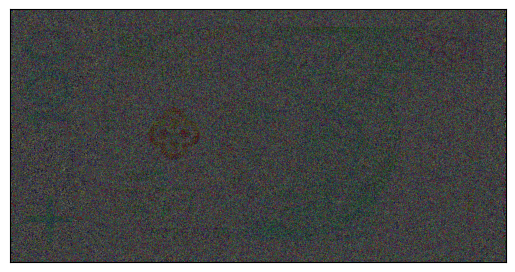

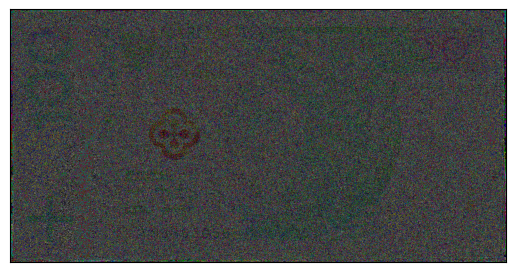

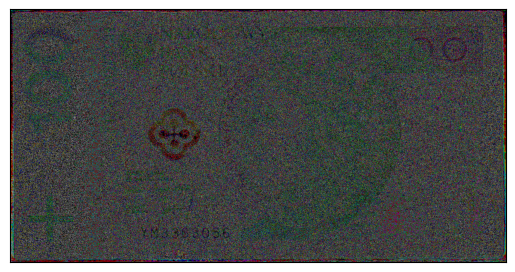

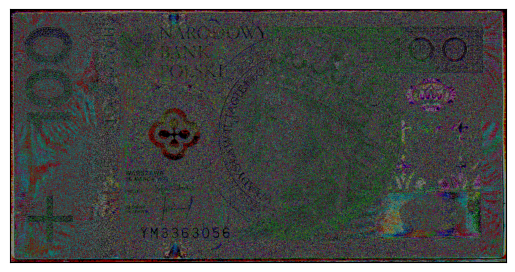

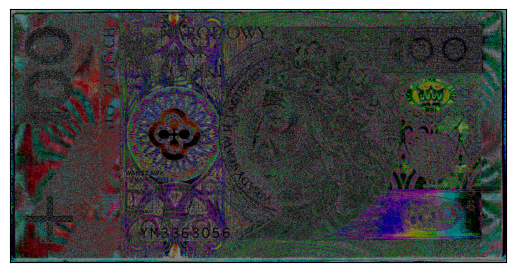

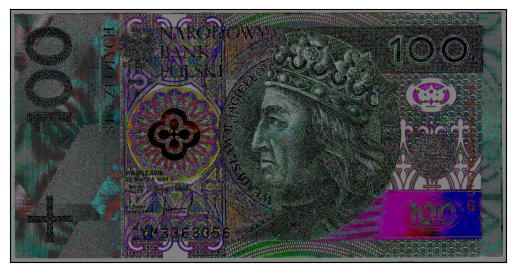

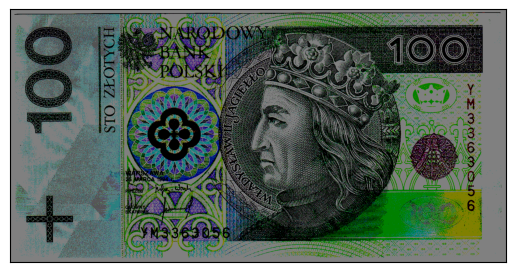

In [5]:
layers = []

for i in range(8):
    layer = (stowa & 2**i) * 2**(7-i)
    layers.append(layer)

for layer in layers:
    plt.imshow(layer)
    plt.xticks([]), plt.yticks([])
    plt.show()

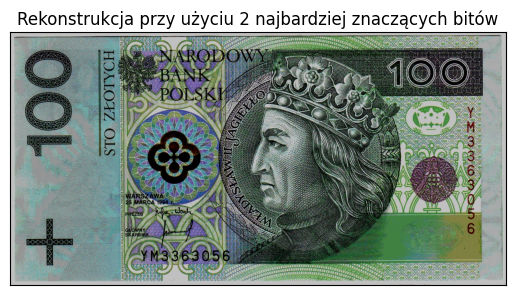

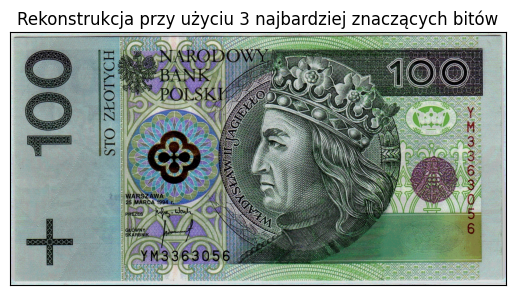

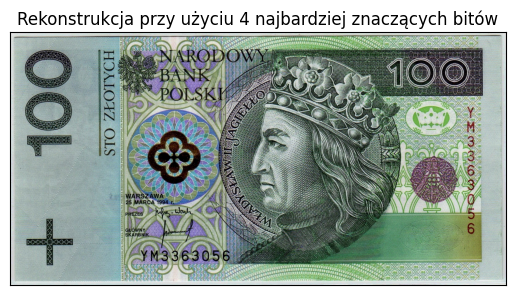

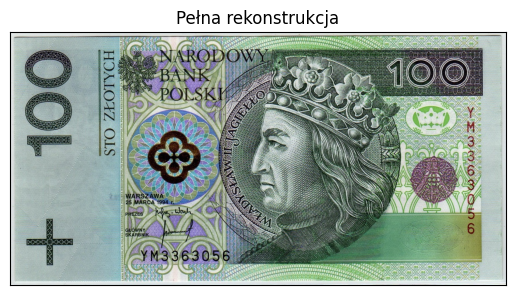

In [9]:
rek1 = layers[7] + layers[6] // 2
plt.imshow(rek1)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja przy użyciu 2 najbardziej znaczących bitów")
plt.show()

rek2 = np.zeros(stowa.shape, dtype=np.uint8)
for i, layer in enumerate(layers[:4:-1]):
    rek2 += layer // 2**i

plt.imshow(rek2)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja przy użyciu 3 najbardziej znaczących bitów")
plt.show()

rek3 = np.zeros(stowa.shape, dtype=np.uint8)
for i, layer in enumerate(layers[:3:-1]):
    rek3 += layer // 2**i

plt.imshow(rek3)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja przy użyciu 4 najbardziej znaczących bitów")
plt.show()

rek4 = np.zeros(stowa.shape, dtype=np.uint8)
for i, layer in enumerate(layers[::-1]):
    rek4 += layer // 2**i

plt.imshow(rek4)
plt.xticks([]), plt.yticks([])
plt.title("Pełna rekonstrukcja")
plt.show()